In [1]:
import sys,os
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display

In [2]:
def extractvaluesforplot(filepath,f1,f2):
    
    louvain={}
    fp = open(filepath+f1,'r')
    fp.readline()
    for line in fp:
        line = line.split()
        dt_db = line[0].split('_')
        temp = float(dt_db[-2])
        if temp not in louvain:
            louvain[temp]={}
        db = float(dt_db[-1].split(":")[0])
        louvain[temp][db] = float(line[-1])
        
    fp.close()
    mixmod ={}
    fp = open(filepath+f2,'r')
    fp.readline()
    for line in fp:
        line = line.split()
        dt_db = line[0].split('_')
        temp = float(dt_db[-2])
        if temp not in mixmod:
            mixmod[temp]={}
        db = float(dt_db[-1].split(":")[0])
        mixmod[temp][db] = float(line[-1])
        
    fp.close()
    return louvain, mixmod 

In [3]:
def preparedata(louvain,mixmod):
    data_louvain=[]
    data_mixmod=[]
    vals= [0.1,0.3,0.5,0.7,0.9,1.0,3.0,5.0,7.0,9.0,10.0]
    for v in vals:
        temp=[]
        temp1=[]
        for v1 in vals:
            temp.append(louvain[v][v1])
            temp1.append(mixmod[v][v1])
        data_louvain.append(temp)
        data_mixmod.append(temp1)
    return data_louvain,data_mixmod


In [2]:
#filepath = './syntheticNetworkGeneration/results/nets121_incWeights/alpha0.7/'
filepath = './syntheticNetworkGeneration/results/nets121/alpha0.7/'
f1 = 'all_louvain_for_corrImpl'
f2 = 'mixmod_for_corrImpl'

In [71]:
louvain, mixmod  = extractvaluesforplot(filepath+'dt_db_mod_files_corrctImp/',f1,f2)
data_louvain,data_mixmod =preparedata(louvain,mixmod)

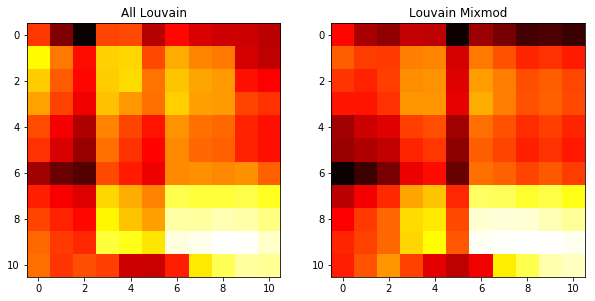

In [72]:
a = np.array(data_louvain)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.title("All Louvain")
plt.subplot(1,2,2)
a = np.array(data_mixmod)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.title("Louvain Mixmod")
plt.show()

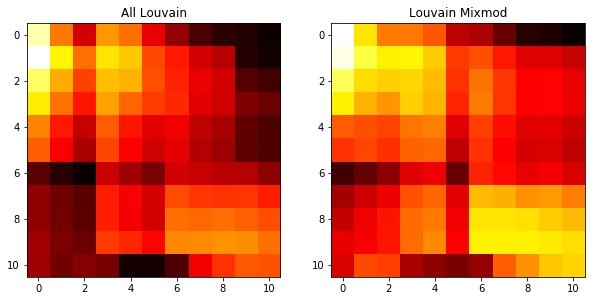

In [73]:
louvain, mixmod  = extractvaluesforplot(filepath+'dt_db_mod_files_corrctImp_without_half/',f1,f2)
data_louvain,data_mixmod =preparedata(louvain,mixmod)


a = np.array(data_louvain)
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.title("All Louvain")
plt.subplot(1,2,2)
a = np.array(data_mixmod)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.title("Louvain Mixmod")
plt.show()

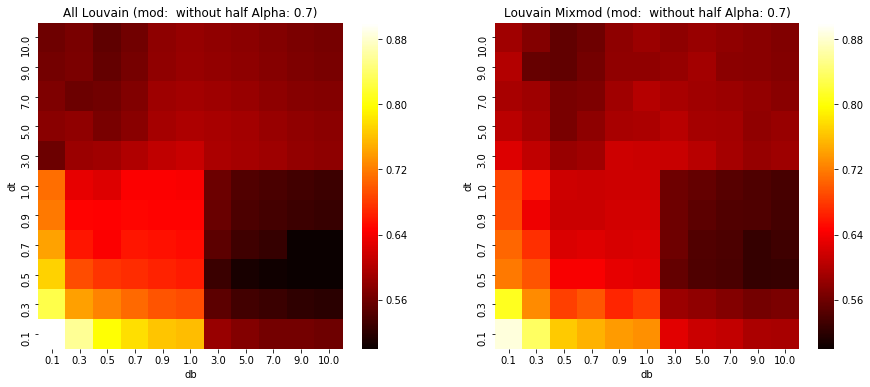

In [6]:
#Code from Luqman for learning. Visualisation master
dm = 1
def extractvaluesforplot2(filepath):
    datalouvain = []
    datamixmod =[]
    fp = open(filepath+f1,'r')
    fp.readline()
    for line in fp:
        line = line.split()
        dt_db = line[0].split('_')
        temp = float(dt_db[-2])/dm
        db = float(dt_db[-1].split(":")[0])/dm
        newrow = [temp, db, float(line[-1])]
        datalouvain.append(newrow)
        
    fp.close()
    
    fp = open(filepath+f2,'r')
    fp.readline()
    for line in fp:
        line = line.split()
        dt_db = line[0].split('_')
        temp = float(dt_db[-2])/dm
        db = float(dt_db[-1].split(":")[0])/dm
        newrow = [temp, db, float(line[-1])]
        datamixmod.append(newrow)
        
    fp.close()
        
    return datalouvain,datamixmod

def plot(dtlouvain,dtmixmod,saveas,titlestr):
    df = pd.DataFrame(dtlouvain, columns = ['dt', 'db', 'modularity'])
    dfp = df.pivot_table(index = 'dt', columns = 'db', values = 'modularity')
    dfpr = dfp.sort_index(ascending = False)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("All Louvain "+titlestr)
    sns.heatmap(data = dfpr,cmap="hot", vmin = 0.5,vmax = 0.9)

    df = pd.DataFrame(dtmixmod, columns = ['dt', 'db', 'modularity'])
    dfp = df.pivot_table(index = 'dt', columns = 'db', values = 'modularity')
    dfpr = dfp.sort_index(ascending = False)
    plt.subplot(1,2,2)
    plt.title("Louvain Mixmod "+titlestr)
    sns.heatmap(data = dfpr, cmap="hot", vmin = 0.5,vmax = 0.9)
    plt.savefig(filepath+saveas)
    plt.show()
    
dtlouvain,dtmixmod = extractvaluesforplot2(filepath+'dt_db_mod_files_corrctImp_without_half/')
plot(dtlouvain,dtmixmod,"dt_db_mod_files_corrctImp_without_half/heatmap","(mod:  without half Alpha: 0.7)")

#dtlouvain,dtmixmod = extractvaluesforplot2(filepath+'dt_db_mod_files_corrctImp/')
#plot(dtlouvain,dtmixmod,"dt_db_mod_files_corrctImp/heatmap","(mod: corrctImp Alpha: 0.7)")
